In [24]:
import pandas as pd

from eval_lib import load_model
from models import Transformer, VPTransformer
from matplotlib import pyplot as plt
import numpy as np
import torch
from data_handling import data_loader
import utils
import pprint
from trainer_lib.datasets import TimeSeriesWindowedTensorDataset, TimeSeriesWindowedDatasetConfig
from signal_decomposition import eemd, wavelet

params, model, _ = load_model(test='vp_wavelet', name='Dangerous_Penguin', epoch=30, model_type=VPTransformer)

print(params)

{'kind': 'vp_transformer', 'vp_bases': 8, 'vp_penalty': 0.2, 'd_model': 128, 'num_heads': 2, 'num_layers': 1, 'd_ff': 2, 'src_seq_length': 192, 'tgt_seq_length': 1, 'src_window': 1, 'tgt_window': 1, 'dropout': 0.1, 'src_size': 7, 'tgt_size': 1}


In [25]:
df = data_loader.load_mavir_data('data/mavir_data/mavir.csv')
df['Power'] = utils.min_max_norm(df['Power'])
sample = utils.sample(df, 1000, start_idx=10000)
data = sample['Power'].to_numpy()

In [26]:
dataset = TimeSeriesWindowedTensorDataset(data, 
                                          TimeSeriesWindowedDatasetConfig(params['src_window'], 
                                          params['tgt_window'], 
                                          params['src_seq_length'], 
                                          params['tgt_seq_length'], 1, False, False),
                                          preprocessor=wavelet.WaveletPreprocessor('db2'))

asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd


torch.Size([192, 7]) torch.Size([1, 1])


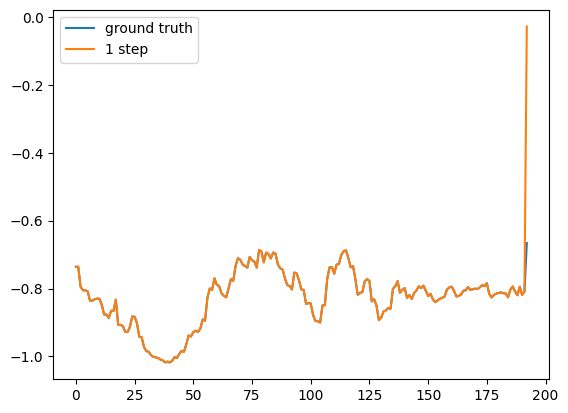

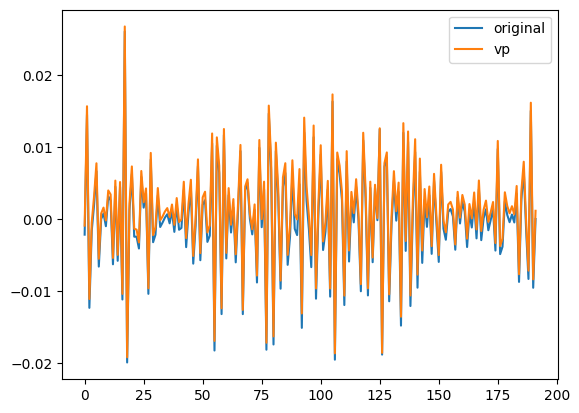

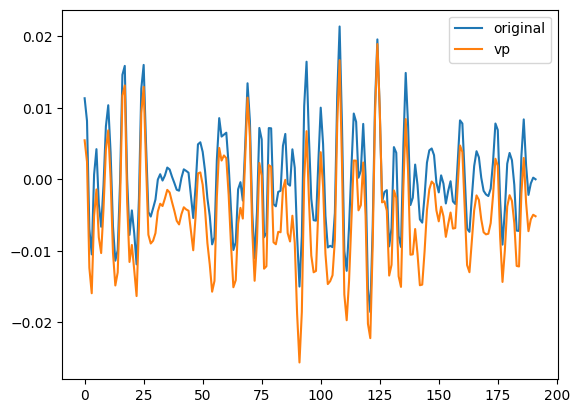

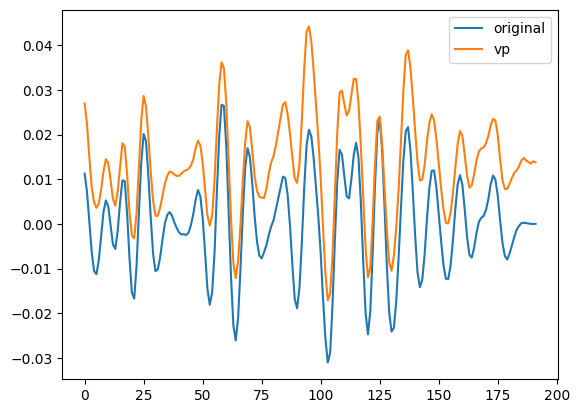

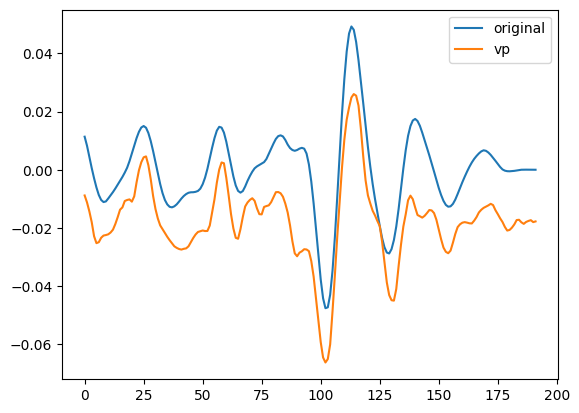

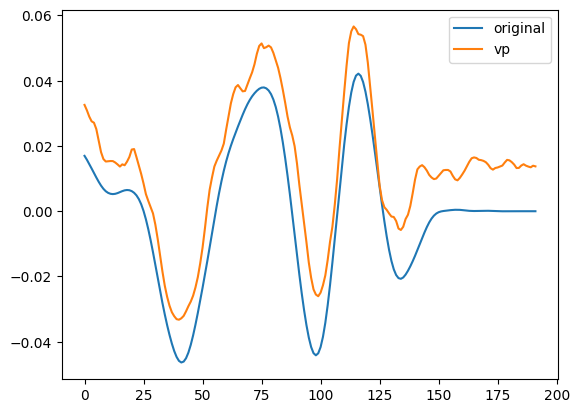

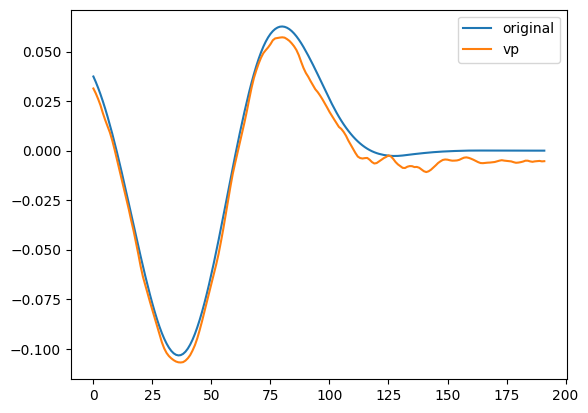

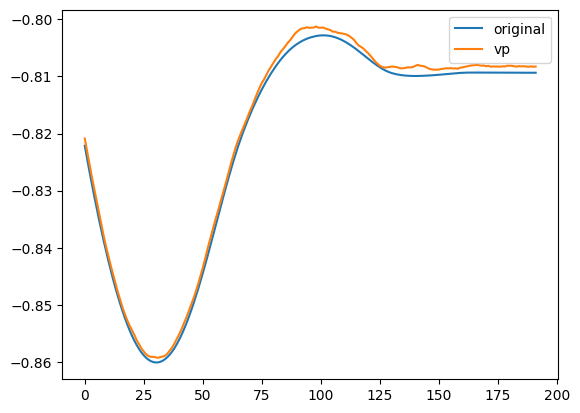

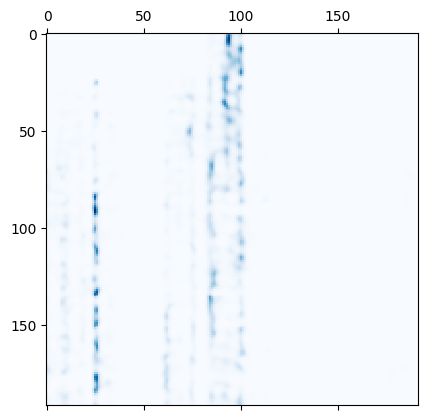

In [27]:
shift, look_back, pred = 0, 24, 1

ones = torch.ones(1, 1, dataset[0][1].shape[-1])

out = ones
print(dataset.get_sequence_from_x_windows(dataset[shift][0].unsqueeze(0)).shape, dataset.get_sequence_from_y_windows(dataset[shift][1].unsqueeze(0)).shape)
gt = torch.concat([dataset.get_sequence_from_x_windows(dataset[shift][0].unsqueeze(0)).sum(1), 
                   dataset.get_sequence_from_y_windows(dataset[shift][1].unsqueeze(0)).sum(1)])
for i in range(pred - 1):
    out = torch.concatenate((ones, model(dataset[shift][0].unsqueeze(0), out)), dim=1)

out, enc_attn, dec_self_attn, dec_cross_attn, vp_out = model(dataset[shift][0].unsqueeze(0), out, True)

output = torch.concat([dataset.get_sequence_from_x_windows(dataset[shift][0].unsqueeze(0)).sum(1), 
                       dataset.get_sequence_from_y_windows(out.detach()).sum(1)])
    
plt.plot(gt.reshape(dataset.sl_x * dataset.ws_x + dataset.sl_y) * dataset.ws_y, label='ground truth')
plt.plot(output.reshape(dataset.sl_x * dataset.ws_x + dataset.sl_y * dataset.ws_y), label=f'{pred} step')            
plt.legend()
plt.show()

orig = dataset.get_sequence_from_x_windows(dataset[shift][0].unsqueeze(0))
vp = dataset.get_sequence_from_x_windows(vp_out.detach())

for i in range(orig.shape[-1]):
    plt.plot(orig[..., i], label='original')
    plt.plot(vp[..., i], label='vp')

    plt.legend()
    plt.show()

plt.matshow(enc_attn[0].detach().numpy()[0, 0, :, :], cmap=plt.cm.Blues)